<a href="https://colab.research.google.com/github/ChristophWuersch/AppliedNeuralNetworks/blob/main/U02/FraudDetection_imbalanced_classes_SOLUTION-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="Bilder/ost_logo.png" width="240"  align="right"/>
<div style="text-align: left"> <b> Applied Neural Networks | FS 2025 </b><br>
<a href="mailto:christoph.wuersch@ost.ch"> © Christoph Würsch </a> </div>
<a href="https://www.ost.ch/de/forschung-und-dienstleistungen/technik/systemtechnik/ice-institut-fuer-computational-engineering/"> Eastern Switzerland University of Applied Sciences OST | ICE </a>


# Imbalanced classification: Missbräuchliche Kreditkartenbezüge

Demonstration des Umgangs mit stark unausgewogenen Klassifikationsproblemen.

## Introduction

Dieses Beispiel befasst sich mit der
[Kaggle Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud/)
Datensatz, um zu demonstrieren, wie
wie man ein Klassifizierungsmodell auf Daten mit stark unausgewogenen Klassen trainiert.

In [158]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import sys

from torch.utils.data import Dataset, DataLoader, TensorDataset
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping

# Print versions in a compact form
print(f"Python version: {sys.version}")
print(f"torch: {torch.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"numpy: {np.__version__}")
print(f"pandas: {pd.__version__}")

Python version: 3.9.19 (main, May  6 2024, 20:12:36) [MSC v.1916 64 bit (AMD64)]
torch: 2.5.1+cpu
matplotlib: 3.9.2
numpy: 1.23.5
pandas: 2.0.3


## Datenaufbereitung

In [159]:
import csv
import numpy as np

# Get the real data from https://www.kaggle.com/mlg-ulb/creditcardfraud/
fname = "creditcard.csv"

all_features = []
all_targets = []
with open(fname) as f:
    for i, line in enumerate(f):
        if i == 0:
            print("HEADER:", line.strip())
            continue  # Skip header
        fields = line.strip().split(",")
        all_features.append([float(v.replace('"', "")) for v in fields[:-1]])
        all_targets.append([int(fields[-1].replace('"', ""))])
        if i == 1:
            print("EXAMPLE FEATURES:", all_features[-1])

features = np.array(all_features, dtype="float32")
targets = np.array(all_targets, dtype="uint8")
print("features.shape:", features.shape)
print("targets.shape:", targets.shape)


HEADER: "Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount","Class"
EXAMPLE FEATURES: [0.0, -1.3598071336738, -0.0727811733098497, 2.53634673796914, 1.37815522427443, -0.338320769942518, 0.462387777762292, 0.239598554061257, 0.0986979012610507, 0.363786969611213, 0.0907941719789316, -0.551599533260813, -0.617800855762348, -0.991389847235408, -0.311169353699879, 1.46817697209427, -0.470400525259478, 0.207971241929242, 0.0257905801985591, 0.403992960255733, 0.251412098239705, -0.018306777944153, 0.277837575558899, -0.110473910188767, 0.0669280749146731, 0.128539358273528, -0.189114843888824, 0.133558376740387, -0.0210530534538215, 149.62]
features.shape: (284807, 30)
targets.shape: (284807, 1)


## (a) Aufteilen in einen Trainings- und Validierungsdatensatz

In [160]:
num_val_samples = int(len(features) * 0.2)

#enter your code here
train_features = features[:-num_val_samples]
train_targets = 
val_features = 
val_targets = 

print("Number of training samples:", len(train_features))
print("Number of validation samples:", len(val_features))


Number of training samples: 227846
Number of validation samples: 56961


In [161]:
train_targets

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [162]:
val_targets

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

## (b) Analyse des Klassenungleichgewichts in der Response

In [163]:
counts = np.bincount(train_targets[:])
print(counts)

#enter your code here


[227429    417]
Number of positive samples in training data: 417 (0.18% of total)


## (c) Standardisierung der Daten auf Basis der Statistik der Trainingsdaten

In [164]:
mean = np.mean(train_features, axis=0)
std = np.std(train_features, axis=0)

#enter your code here



In [165]:
train_features.shape[1]

30

In [166]:
# Custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]

# Create Dataset objects
train_dataset = CustomDataset(train_features, train_targets)
val_dataset   = CustomDataset(val_features, val_targets)

batch_size = 128

#enter your code here
train_loader = DataLoader(...)
val_loader   = DataLoader(...)

## (d) Aufbauen eines binären Klassifizierungsmodells

### Konfigurierbares Classifier-Netzwerk

In [168]:
# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [169]:
class ClassifierNet(pl.LightningModule):
    def __init__(self, layer_sizes):
        """
        Initialize the classifier network.
        
        Args:
        - layer_sizes (list): A list of integers specifying the number of nodes
                              in each hidden layer. The first element is the input size,
                              and the last element is the output size.
        """
        super(ClassifierNet, self).__init__()

        self.layers = nn.ModuleList()
        for i in range(len(layer_sizes) - 1):
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i + 1]))
            if i < len(layer_sizes) - 2:  # Add dropout only for hidden layers
                self.layers.append(nn.ReLU())
                self.layers.append(nn.Dropout(p=0.5))  # Dropout probability is 0.5

        self.output_activation = nn.Sigmoid()  # Output layer activation for binary classification
        self.criterion = nn.BCELoss()  # Binary Cross-Entropy Loss

        # Initialize metric storage
        self.train_losses = []
        self.val_losses = []
        self.train_accuracies = []
        self.val_accuracies = []

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return self.output_activation(x)  # Apply sigmoid activation at the output layer

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x).squeeze()
        loss = self.criterion(y_hat, y.squeeze())
        acc = ((y_hat > 0.5).float() == y).float().mean()
        self.log('train_loss', loss)
        self.log('train_acc', acc, prog_bar=True)
        #enter your code here
        self.train_losses. ...
        self.train_accuracies. ...
        return {'loss': loss, 'train_acc': acc}

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x).squeeze()
        loss = self.criterion(y_hat, y.squeeze())
        acc = ((y_hat > 0.5).float() == y).float().mean()
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)
        #enter your code here
        self.val_losses. ...
        self.val_accuracies. ...
        return {'val_loss': loss, 'val_acc': acc}

    def configure_optimizers(self):
        return torch.optim.RMSprop(self.parameters(), lr=0.001)


### Helper-Funktion für die Lernkurven

In [170]:
# Function to plot learning curves
def plot_learning_curves(model,max_epochs):
    epochs_train = np.array(range(1, len(model.train_losses) + 1)) / len(model.train_losses)*max_epochs 
    epochs_val = np.array(range(1, len(model.val_losses) + 1)) / len(model.val_losses)*max_epochs
    
    # Plotting
    plt.figure(figsize=(12, 5))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_train, model.train_losses, 'b.-', label='Training Loss')
    plt.plot(epochs_val, model.val_losses, 'r.-', label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_train, model.train_accuracies, 'b.-', label='Training Accuracy')
    plt.plot(epochs_val, model.val_accuracies, 'r.-', label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()


    plt.tight_layout()
    plt.show()



## (e) Modell instanzieren und trainieren

Verwenden Sie ein MLP mit der folgenden Anzahl an Neuronen:
- Input Layer: 20 Neuronen
1. Hidden Layer: 16 Neuronen + Dropout + ReLU-Aktivierung
2. Hidden Layer: 32 Neuronen + Dropout + ReLU-Aktivierung
3. Hidden Layer: 32 Neuronen + Dropout + ReLU-Aktivierung
4. Hidden Layer: 16 Neuronen 
- Output Layer: 1 (sigmoid)


In [171]:
# Model instantiation
# enter your code here
layer_sizes = [...]  # Input size, hidden layers, output size
model = ClassifierNet(layer_sizes)

In [172]:
def TrainAndPlot(model, max_epochs=5):
    # Trainer setup
    trainer = pl.Trainer(max_epochs=max_epochs, log_every_n_steps=1)
    trainer.fit(model, train_loader, val_loader)
    plot_learning_curves(model, max_epochs)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name              | Type       | Params | Mode 
---------------------------------------------------------
0 | layers            | ModuleList | 2.6 K  | train
1 | output_activation | Sigmoid    | 0      | train
2 | criterion         | BCELoss    | 0      | train
---------------------------------------------------------
2.6 K     Trainable params
0         Non-trainable params
2.6 K     Total params
0.011     Total estimated model params size (MB)
16        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=1` reached.


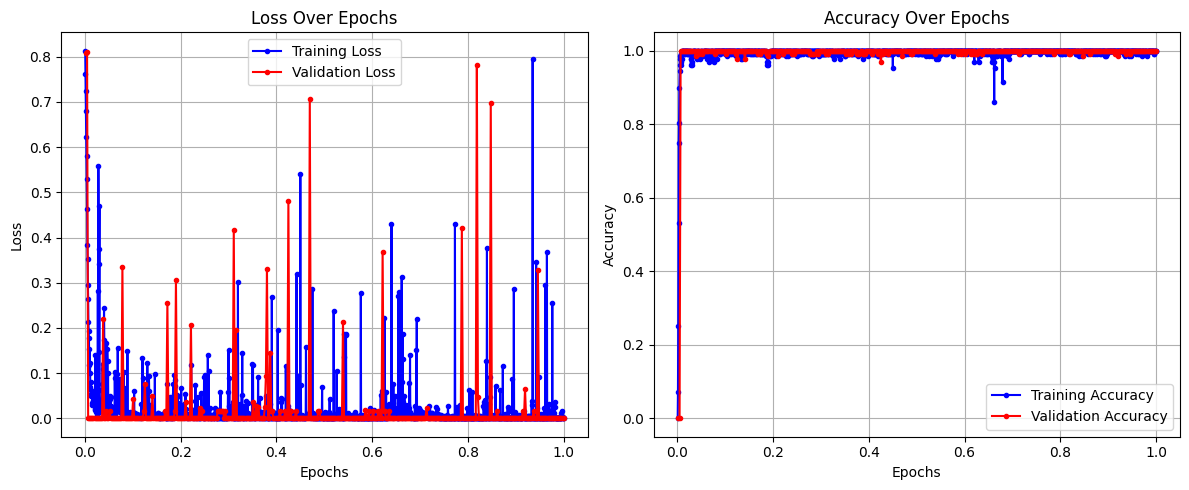

In [173]:
# Example usage
TrainAndPlot(model, max_epochs=1)  

## (f) Trainieren Sie das Modell mit dem `class_weight`-Argument 

Da die Klassen sehr stark imbalanced sind, werden wir den Loss der Minderheitsklasse (minority class) indirekt proportional zu ihrem Anteil gewichten.

$$ w_0 = \frac{n_{\text{tot}}}{n_0}= \frac{n_0+n_1}{n_0}$$
$$ w_1 = \frac{n_{\text{tot}}}{n_1}= \frac{n_0+n_1}{n_1}$$



In [174]:
# Define class weights (example with imbalanced data)
total_samples = len(train_targets)
# enter your code here  
weight_for_0 = ...
weight_for_1 = ...
class_weights = torch.tensor([weight_for_0, weight_for_1])
print("Class weights:", class_weights)  

Class weights: tensor([  1.0018, 546.3933])


In [175]:
counts[0]/counts[1]

545.3932853717026

In [176]:
import torch
import torch.nn as nn
import pytorch_lightning as pl

class ClassifierNet(pl.LightningModule):
    def __init__(self, layer_sizes, class_weights):
        """
        Args:
        - layer_sizes (list): A list specifying the layer sizes for the model.
        - class_weights (torch.Tensor): Class weights for balancing loss computation.
        """
        super(ClassifierNet, self).__init__()

        self.class_weights = class_weights  # Store class weights

        # Define the model
        self.layers = nn.ModuleList()
        for i in range(len(layer_sizes) - 1):
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i + 1]))
            if i < len(layer_sizes) - 2:  # Add activation and dropout for hidden layers
                self.layers.append(nn.ReLU())
                self.layers.append(nn.Dropout(0.5))  # Dropout probability

        self.output_activation = nn.Sigmoid()  # Sigmoid for binary classification

        # Initialize metric storage
        self.train_losses = []
        self.val_losses = []
        self.train_accuracies = []
        self.val_accuracies = []

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return self.output_activation(x)

    def compute_loss(self, y_hat, y):
        """
        Compute weighted loss for a batch.
        Args:
        - y_hat: Predicted outputs
        - y: Ground-truth labels
        """
        # Generate weights for each batch element
        batch_weights = self.class_weights[y.long()]  # Map weights based on labels
        loss_fn = nn.BCELoss(weight=batch_weights)    # Use BCELoss with per-batch weights
        loss = loss_fn(y_hat, y.float())
        return loss

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x).squeeze()  # Forward pass
        loss = self.compute_loss(y_hat,y)  # Compute loss
        acc = ((y_hat > 0.5).float() == y).float().mean()

        # Log metrics
        self.log("train_loss", loss, prog_bar=True)
        self.log("train_acc", acc, prog_bar=True)
        self.train_losses.append(loss.item())
        self.train_accuracies.append(acc.item())
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x).squeeze() # Forward pass
        loss = self.compute_loss(y_hat,y)
        acc = ((y_hat > 0.5).float() == y).float().mean()
        self.val_losses.append(loss.item())
        self.val_accuracies.append(acc.item())

        # Log metrics
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_acc", acc, prog_bar=True)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

Wir berechnen für jede Klasse das zugehörige Klassengewicht und instanzieren unser Modell (`model2`) mit der neuen Klasse, die in der Verlustfunktion die Klassengewichte berücksichtigt.

In [177]:


# Model initialization
layer_sizes = [30, 16, 32, 32, 16, 1]  # Input size, hidden layers, output size
model2 = ClassifierNet(layer_sizes, class_weights)

In [178]:
counts[0].item()


227429

Nun starten wir das Training mit `PyTorch Lightning`.

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name              | Type       | Params | Mode 
---------------------------------------------------------
0 | layers            | ModuleList | 2.6 K  | train
1 | output_activation | Sigmoid    | 0      | train
---------------------------------------------------------
2.6 K     Trainable params
0         Non-trainable params
2.6 K     Total params
0.011     Total estimated model params size (MB)
15        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=1` reached.


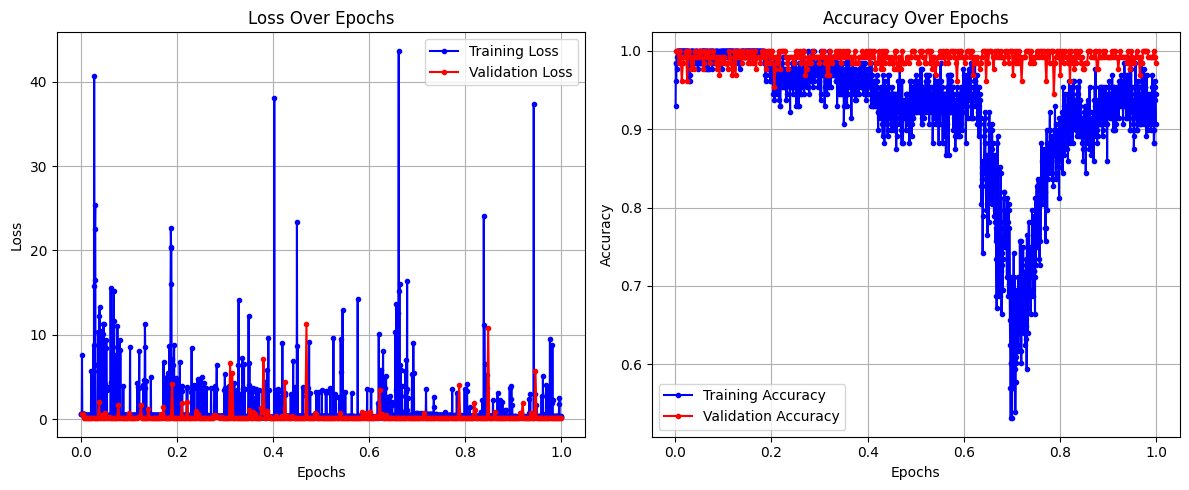

In [179]:
TrainAndPlot(model2, max_epochs=1)  

## (g) Berechnen der Konfusionsmatrix

Metriken wie **True Positives (TP)**, **True Negatives (TN)**, **False Positives (FP)**, **False Negatives (FN)** und den **F1-Score** lassen sich in PyTorch Lightning einfach berechnen und nach dem Training für sowohl `train_loader` als auch `test_loader` anzeigen. Wir verwenden die Bibliothek `torchmetrics`, die nahtlos mit PyTorch Lightning integriert werden kann.

Diese Begriffe `TP,TN,FP,FN`stammen aus der **Confusion Matrix**, die zur Evaluierung von Klassifikationsmodellen verwendet wird. Für ein binäres Klassifikationsproblem gibt es zwei Klassen: **Positiv** (1) und **Negativ** (0).

- **True Positives (TP):** Anzahl der positiven Beispiele, die korrekt als positiv vorhergesagt wurden.
- **True Negatives (TN):** Anzahl der negativen Beispiele, die korrekt als negativ vorhergesagt wurden.
- **False Positives (FP):** Anzahl der negativen Beispiele, die fälschlicherweise als positiv vorhergesagt wurden.
- **False Negatives (FN):** Anzahl der positiven Beispiele, die fälschlicherweise als negativ vorhergesagt wurden.

Der **F1-Score** ist ein Maß für die Balance zwischen **Precision** und **Recall**. Er wird wie folgt berechnet:

1. **Precision (P):** Der Anteil der korrekt vorhergesagten positiven Beispiele an allen als positiv vorhergesagten Beispielen:
   $$ P = \frac{\text{TP}}{\text{TP} + \text{FP}} $$

2. **Recall (R):** Der Anteil der korrekt vorhergesagten positiven Beispiele an allen tatsächlich positiven Beispielen:
   $$ R = \frac{\text{TP}}{\text{TP} + \text{FN}} $$

3. **F1-Score:** Das harmonische Mittel von Precision und Recall:
   $$ F1 = 2 \cdot \frac{P \cdot R}{P + R} $$


Falls `torchmetrics` noch nicht installiert ist: `pip install torchmetrics`


In [142]:
def compute_and_display_metrics(model, data_loader, metrics, device, mode="train"):
    """
    Compute and display metrics for a given data loader.

    Args:
    - model: Trained PyTorch Lightning model.
    - data_loader: DataLoader for the dataset (train or test).
    - metrics: torchmetrics.MetricCollection to compute metrics.
    - device: Device to perform computations (e.g., 'cpu' or 'cuda').
    - mode: 'train' or 'test' to label the output.
    """
    model.eval()  # Set the model to evaluation mode
    metrics.reset()  # Reset metrics

    all_preds = []
    all_targets = []

    with torch.no_grad():
        for batch in data_loader:
            x, y = batch
            x, y = x.to(device), y.to(device)
            y_hat = model(x).squeeze()

            preds = (y_hat > 0.5).long()  # Binary predictions
            all_preds.append(preds)
            all_targets.append(y)

    # Concatenate all predictions and targets
    all_preds = torch.cat(all_preds)
    all_targets = torch.cat(all_targets)

    # Compute metrics
    metric_results = metrics(all_preds, all_targets)
    
    # Print metrics
    print(f"\nMetrics for {mode} set:")
    for name, value in metric_results.items():
        if isinstance(value, torch.Tensor) and value.numel() > 1:  # For tensors like confusion matrix
            print(f"{name}: \n{value}")
        else:  # Scalar metrics like F1-score
            print(f"{name}: {value.item():.4f}")

    # Return results for further use if needed
    return metric_results


In [143]:
from torchmetrics.classification import BinaryConfusionMatrix, BinaryF1Score
from torchmetrics import MetricCollection, ConfusionMatrix, F1Score

# Define metrics for binary classification
metrics = MetricCollection({
    "confusion_matrix": BinaryConfusionMatrix(),  # Confusion Matrix for binary tasks
    "f1_score": BinaryF1Score(),                 # F1-score for binary tasks
}).to(device)


Evaluiere die Metriken für das Modell mit gewichteter Loss-Funtion:

In [144]:
# Assuming 'train_loader' and 'val_loader' are defined, and 'model' is trained
# Compute metrics for train and test sets

#end your code here
compute_and_display_metrics(model2, train_loader, metrics, device, mode="train")
compute_and_display_metrics(model2, ....)



Metrics for train set:
confusion_matrix: 
tensor([[225576,   1847],
        [    48,    369]])
f1_score: 0.2803

Metrics for test set:
confusion_matrix: 
tensor([[56765,   120],
        [   15,    60]])
f1_score: 0.4706


{'confusion_matrix': tensor([[56765,   120],
         [   15,    60]]),
 'f1_score': tensor(0.4706)}

Evaluiere die Metriken für das Modell mit standard Loss-Funtion (gleichgewichtet für alle Klassen):

In [ ]:
# enter your code here

compute_and_display_metrics(...)
compute_and_display_metrics(....)

## (g) Interpretation, Bewertung des Learners

Am Ende des Trainings haben wir von 56.961 Validierungstransaktionen:

- 60 von ihnen korrekt als betrügerisch identifiziert
- 15 betrügerische Transaktionen werden übersehen
- um den Preis, dass wir 120 legitime Transaktionen falsch kennzeichnen

In der realen Welt würde man der Klasse 1 ein noch höheres Gewicht beimessen,
um der Tatsache Rechnung zu tragen, dass falsche Negativmeldungen teurer sind als falsche Positivmeldungen.

Das nächste Mal, wenn Ihre Kreditkarte bei einem Online-Einkauf abgelehnt wird - das ist der Grund.